In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
data_train = pd.read_csv('Inputs/train.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
X_train = data_train[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
Y_train = data_train[['SalePrice']].values

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(14, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'mse')

In [9]:
output = model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
46/46 [==============================] - 3s 5ms/step - loss: 39038545920.0000
Epoch 2/300
46/46 [==============================] - 0s 7ms/step - loss: 39037460480.0000
Epoch 3/300
46/46 [==============================] - 0s 7ms/step - loss: 39036739584.0000
Epoch 4/300
46/46 [==============================] - 0s 7ms/step - loss: 39036334080.0000
Epoch 5/300
46/46 [==============================] - 0s 4ms/step - loss: 39036002304.0000
Epoch 6/300
46/46 [==============================] - 0s 3ms/step - loss: 39035699200.0000
Epoch 7/300
46/46 [==============================] - 0s 3ms/step - loss: 39035420672.0000
Epoch 8/300
46/46 [==============================] - 0s 3ms/step - loss: 39035142144.0000
Epoch 9/300
46/46 [==============================] - 0s 6ms/step - loss: 39034871808.0000
Epoch 10/300
46/46 [==============================] - 0s 5ms/step - loss: 39034597376.0000
Epoch 11/300
46/46 [==============================] - 0s 4ms/step - loss: 39034343424.0000
Epoch 12

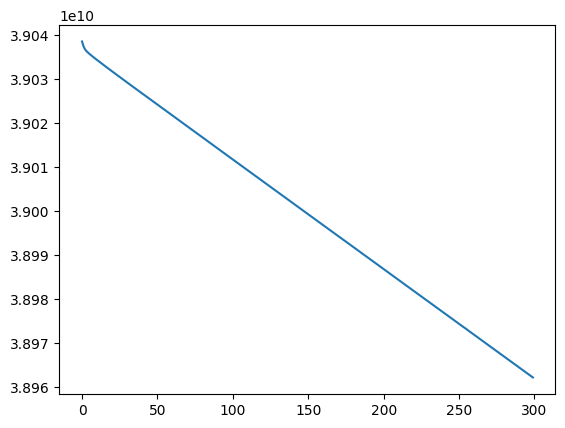

In [10]:
plt.plot(output.history['loss'])
plt.show()

In [11]:
data_test = pd.read_csv('Inputs/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# X_test = data_test[['YearBuilt', 'GarageArea', 'PoolArea', 'FullBath', '1stFlrSF', '2ndFlrSF']].values
# Y_test = data_test[['SalePrice']].values

In [ ]:
# model.evaluate(X_test, Y_test)

In [ ]:
# model.predict()

In [12]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model = tf.keras.models.load_model('my_model.h5 ')